In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('/content/corona_tested_individuals_ver_006.english.csv')

<ipython-input-2-de81257403d8>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/corona_tested_individuals_ver_006.english.csv')


In [ ]:
df.sample(5)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
162572,2020-04-07,0.0,0.0,0,0,0,negative,Yes,female,Other
237400,2020-03-27,0.0,0.0,0,0,0,negative,No,female,Other
253960,2020-03-24,1.0,1.0,1,0,1,positive,No,female,Contact with confirmed
91090,2020-04-19,0.0,0.0,0,0,0,negative,NaN,female,Other
31072,2020-04-26,0.0,0.0,0,0,0,negative,NaN,female,Other


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263827 entries, 0 to 263826
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   test_date            263827 non-null  object 
 1   cough                263586 non-null  float64
 2   fever                263585 non-null  float64
 3   sore_throat          263827 non-null  int64  
 4   shortness_of_breath  263827 non-null  int64  
 5   head_ache            263827 non-null  int64  
 6   corona_result        263827 non-null  object 
 7   age_60_and_above     141019 non-null  object 
 8   gender               258007 non-null  object 
 9   test_indication      263827 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 20.1+ MB


In [ ]:
df['test_indication'].value_counts()

test_indication
Other                     230018
Abroad                     23979
Contact with confirmed      9830
Name: count, dtype: int64

In [ ]:
df.isnull().mean() * 100

test_date               0.000000
cough                   0.091348
fever                   0.091727
sore_throat             0.000000
shortness_of_breath     0.000000
head_ache               0.000000
corona_result           0.000000
age_60_and_above       46.548685
gender                  2.205991
test_indication         0.000000
dtype: float64

In [ ]:
cols = ['sore_throat','shortness_of_breath', 'head_ache']
df = df.dropna(subset=cols)

In [ ]:
df.shape

(263827, 10)

In [ ]:
df.duplicated().sum()

258116

In [ ]:
# Working with test_date column
# Converting to datetime datatype
df['test_date'] = pd.to_datetime(df['test_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263827 entries, 0 to 263826
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   test_date            263827 non-null  datetime64[ns]
 1   cough                263586 non-null  float64       
 2   fever                263585 non-null  float64       
 3   sore_throat          263827 non-null  int64         
 4   shortness_of_breath  263827 non-null  int64         
 5   head_ache            263827 non-null  int64         
 6   corona_result        263827 non-null  object        
 7   age_60_and_above     141019 non-null  object        
 8   gender               258007 non-null  object        
 9   test_indication      263827 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 20.1+ MB


In [ ]:
df['test_date_month'] = df['test_date'].dt.month_name()
df.sample(5)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,test_date_month
105912,2020-04-17,0.0,0.0,0,0,0,negative,NaN,male,Other,April
109329,2020-04-16,0.0,0.0,0,0,0,negative,NaN,female,Other,April
157127,2020-04-09,1.0,0.0,0,0,0,negative,No,male,Other,April
170429,2020-04-06,0.0,0.0,0,0,0,negative,No,female,Other,April
65084,2020-04-21,0.0,0.0,0,0,0,negative,NaN,male,Other,April


In [ ]:
df['test_date_day'] = df['test_date'].dt.day
df.sample(5)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,test_date_month,test_date_day
171674,2020-04-06,0.0,0.0,0,0,0,negative,No,female,Other,April,6
247591,2020-03-26,0.0,0.0,0,0,0,negative,No,male,Other,March,26
32156,2020-04-25,0.0,0.0,0,0,0,negative,NaN,male,Other,April,25
33047,2020-04-25,0.0,0.0,0,0,0,negative,NaN,female,Other,April,25
31727,2020-04-25,0.0,0.0,0,0,0,negative,NaN,male,Other,April,25


## Univariate Analysis

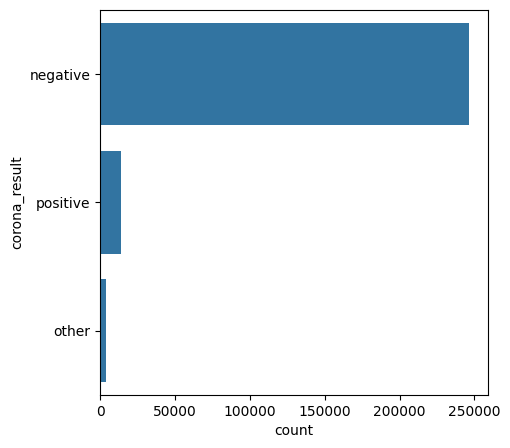

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(df['corona_result'])
plt.show()

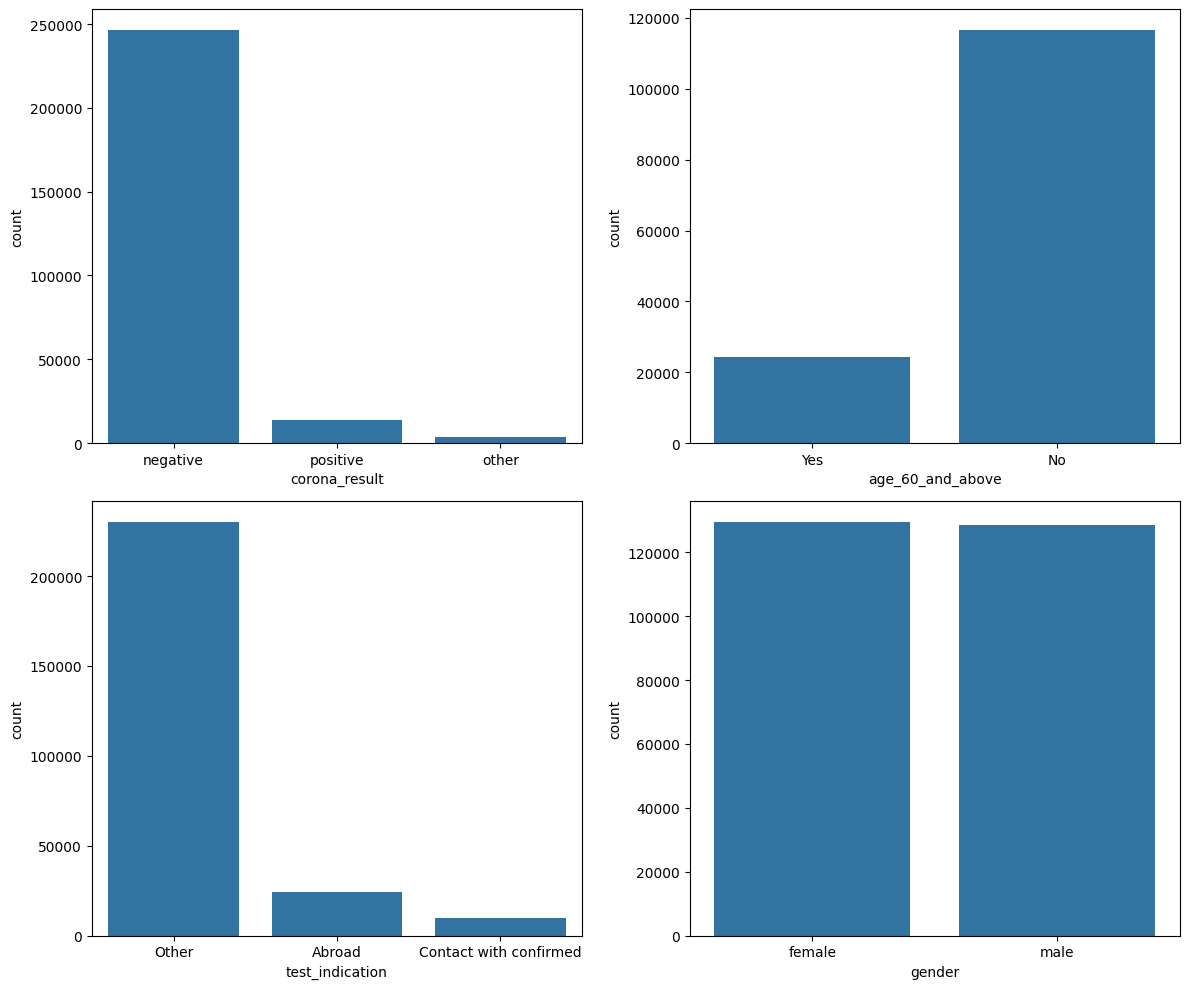

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Plot for Column1
plt.subplot(2, 2, 1)
sns.countplot(x='corona_result', data=df)

# Plot for Column2
plt.subplot(2, 2, 2)
sns.countplot(x='age_60_and_above', data=df)

# Plot for Column3
plt.subplot(2, 2, 3)
sns.countplot(x='test_indication', data=df)

# Plot for Column4
plt.subplot(2, 2, 4)
sns.countplot(x='gender', data=df)

# Show plot
plt.tight_layout()
plt.show()

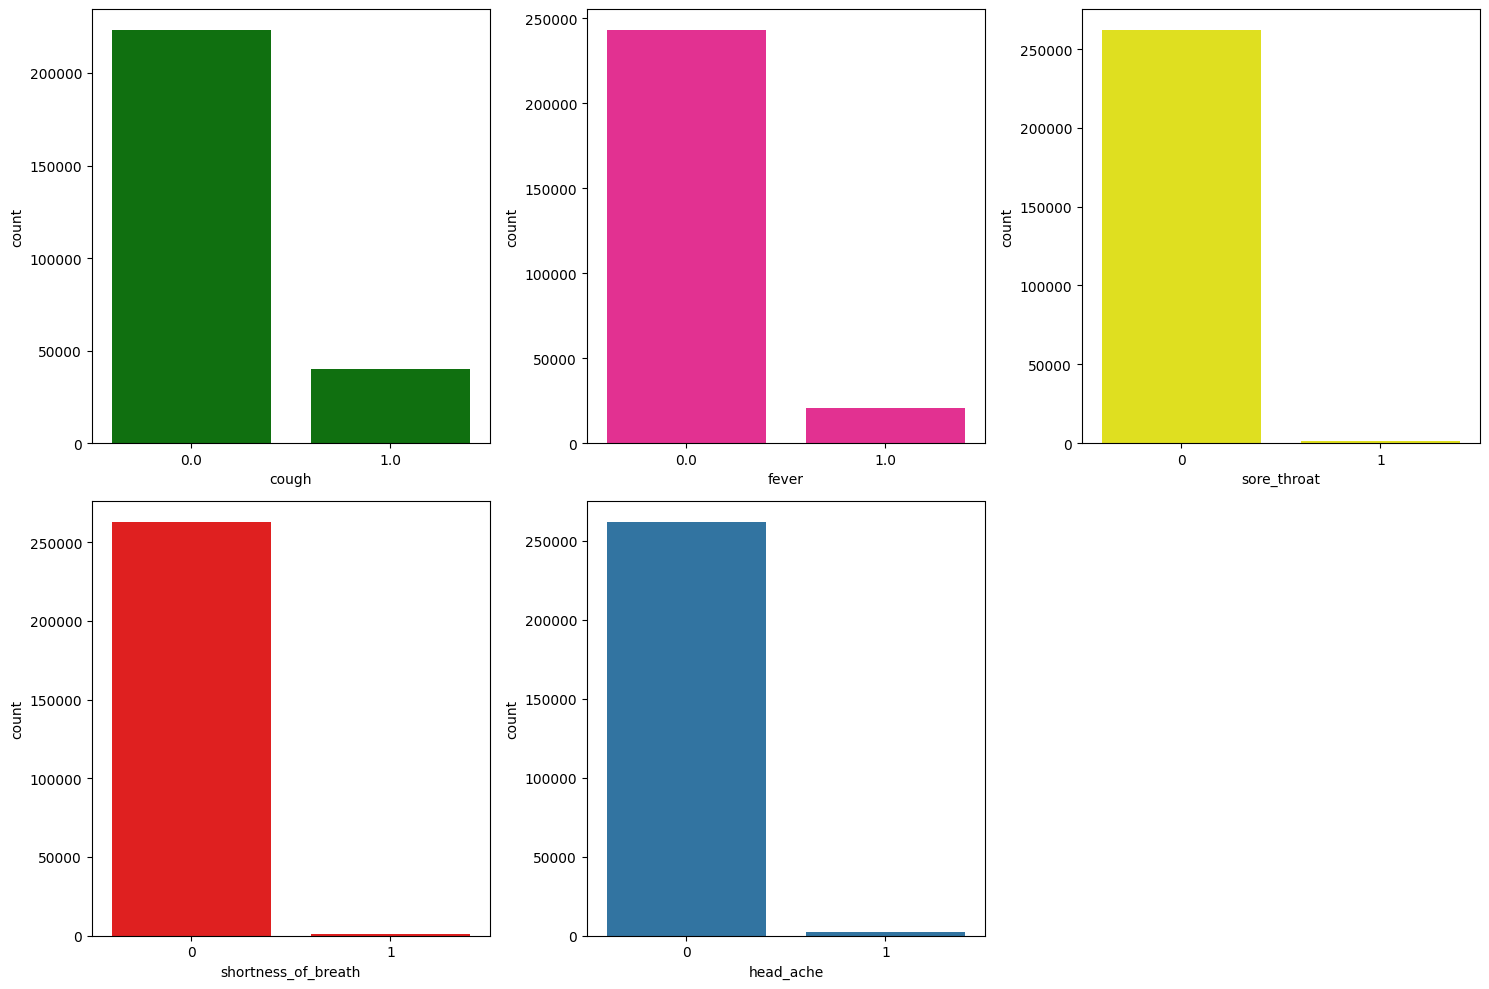

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plot for Column1
plt.subplot(2, 3, 1)
sns.countplot(x='cough', data=df, color='green')

# Plot for Column2
plt.subplot(2, 3, 2)
sns.countplot(x='fever', data=df, color='deeppink')

# Plot for Column3
plt.subplot(2, 3, 3)
sns.countplot(x='sore_throat', data=df, color='yellow')

# Plot for Column4
plt.subplot(2, 3, 4)
sns.countplot(x='shortness_of_breath', data=df, color='red')

# Plot for Column5
plt.subplot(2, 3, 5)
sns.countplot(x='head_ache', data=df)

# Show plot
plt.tight_layout()
plt.show()

## Bivariate Analysis

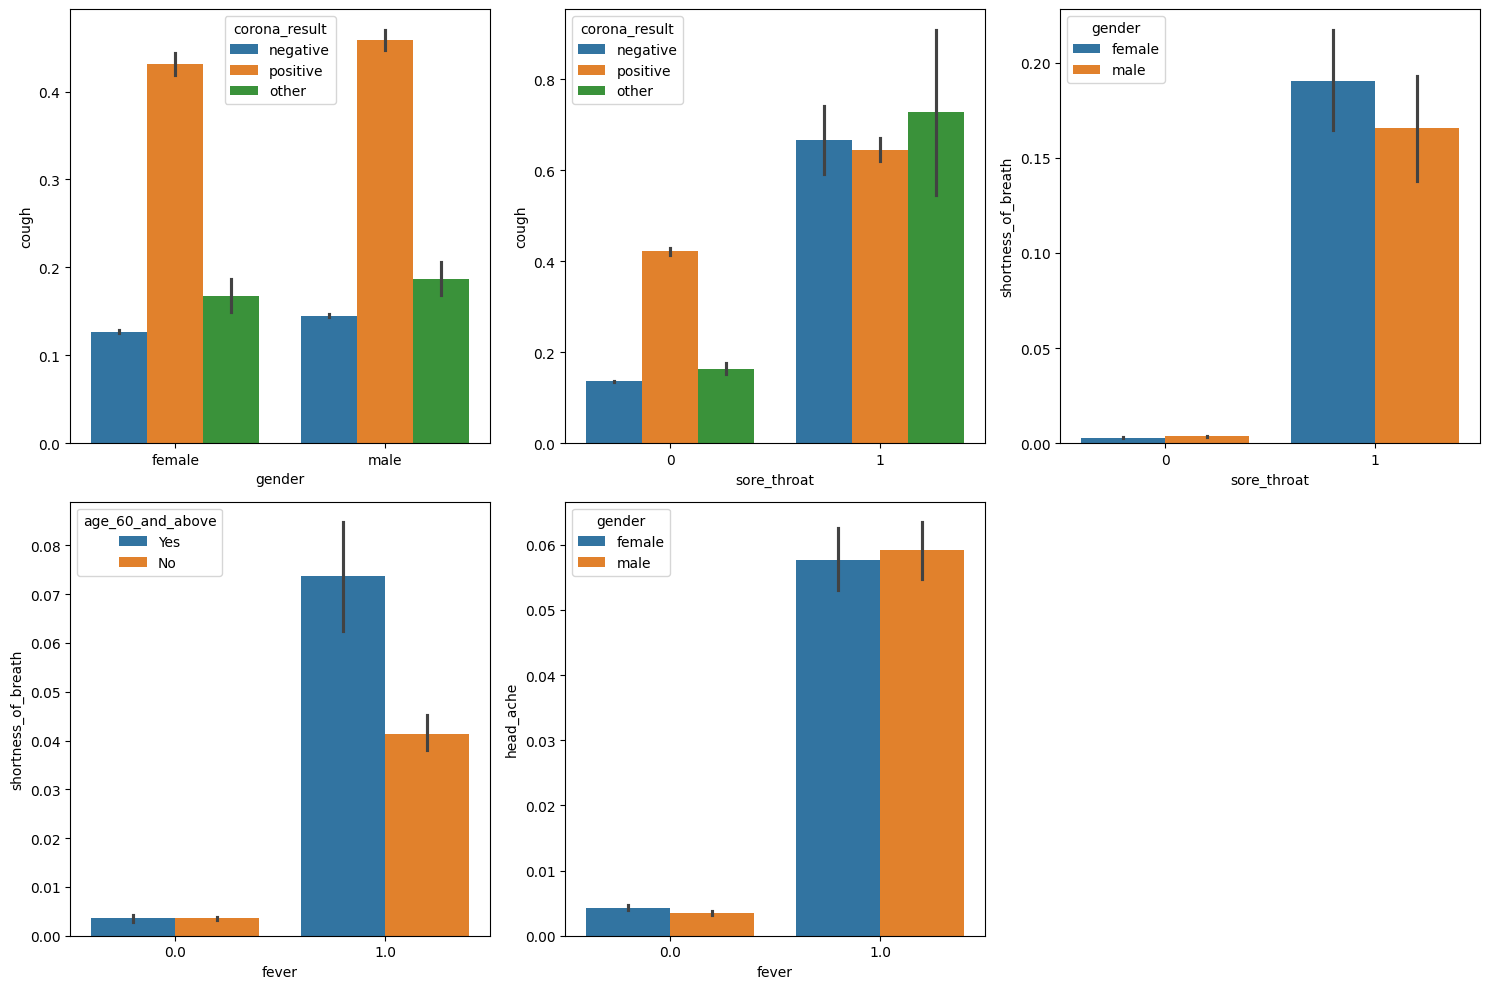

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plot for Column1
plt.subplot(2, 3, 1)
sns.barplot(data=df, x='gender', y='cough' ,hue=df['corona_result'])

# Plot for Column2
plt.subplot(2, 3, 2)
sns.barplot(data=df, x='sore_throat', y='cough' ,hue=df['corona_result'])

# Plot for Column3
plt.subplot(2, 3, 3)
sns.barplot(data=df ,x='sore_throat', y='shortness_of_breath', hue=df['gender'])

# Plot for Column4
plt.subplot(2, 3, 4)
sns.barplot(data=df ,x='fever', y='shortness_of_breath', hue=df['age_60_and_above'])

# Plot for Column5
plt.subplot(2, 3, 5)
sns.barplot(data=df ,x='fever', y='head_ache', hue=df['gender'])

# Show plot
plt.tight_layout()
plt.show()

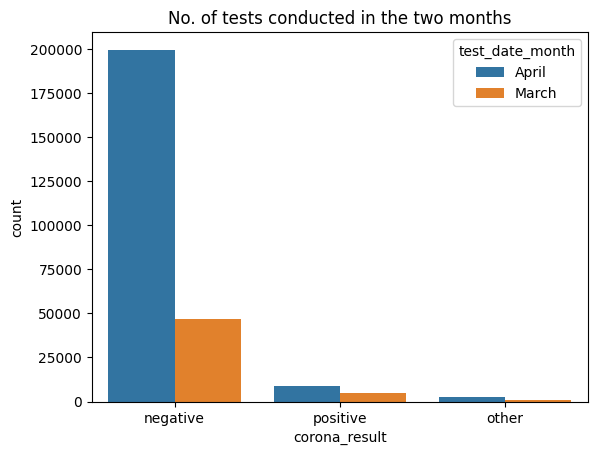

In [ ]:
plt.title("No. of tests conducted in the two months")
sns.countplot(data=df, x='corona_result', hue='test_date_month')
plt.show()

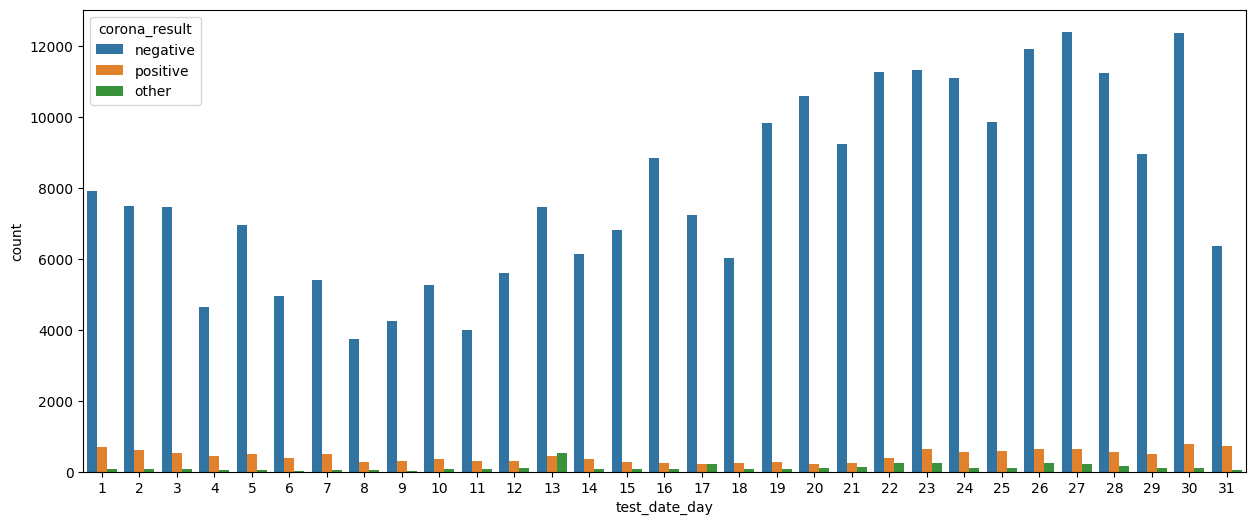

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='test_date_day', hue='corona_result')
plt.show()

## Train test split

In [ ]:
from sklearn.model_selection import train_test_split

X = df
y = df['corona_result']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X_train

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,test_date_month,test_date_day
55411,2020-04-22,0.0,0.0,0,0,0,negative,NaN,female,Other,April,22
173592,2020-04-06,0.0,0.0,0,0,0,negative,No,male,Other,April,6
230205,2020-03-28,1.0,1.0,0,0,0,negative,No,male,Abroad,March,28
69516,2020-04-21,0.0,0.0,0,0,0,negative,NaN,female,Other,April,21
233964,2020-03-28,0.0,0.0,0,0,0,negative,No,female,Other,March,28
...,...,...,...,...,...,...,...,...,...,...,...,...
33867,2020-04-25,0.0,0.0,0,0,0,negative,NaN,male,Other,April,25
84434,2020-04-19,1.0,0.0,0,0,0,negative,NaN,male,Other,April,19
95816,2020-04-18,0.0,0.0,0,0,0,negative,NaN,male,Other,April,18
203245,2020-04-01,0.0,0.0,0,0,0,negative,No,male,Other,April,1


## Handling Missing data

In [ ]:
X_train['age_60_and_above_imputed'] = X_train['age_60_and_above']
X_test['age_60_and_above_imputed'] = X_test['age_60_and_above']

X_train['gender_imputed'] = X_train['gender']
X_test['gender_imputed'] = X_test['gender']

In [ ]:
X_train.sample(5)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,test_date_month,test_date_day,age_60_and_above_imputed,gender_imputed
21009,2020-04-27,0.0,0.0,0,0,0,negative,NaN,male,Other,April,27,NaN,male
37664,2020-04-24,0.0,0.0,0,0,0,negative,NaN,female,Other,April,24,NaN,female
41048,2020-04-24,0.0,0.0,0,0,0,positive,NaN,male,Contact with confirmed,April,24,NaN,male
191881,2020-04-03,0.0,0.0,0,0,0,negative,No,male,Other,April,3,No,male
218899,2020-03-30,0.0,0.0,0,0,0,negative,No,male,Other,March,30,No,male


In [ ]:
X_train['age_60_and_above_imputed'][X_train['age_60_and_above_imputed'].isnull()] = X_train['age_60_and_above'].dropna().sample(X_train['age_60_and_above'].isnull().sum(), replace=True).values
X_test['age_60_and_above_imputed'][X_test['age_60_and_above_imputed'].isnull()] = X_train['age_60_and_above'].dropna().sample(X_test['age_60_and_above'].isnull().sum(), replace=True).values

X_train['gender_imputed'][X_train['gender_imputed'].isnull()] = X_train['gender'].dropna().sample(X_train['gender'].isnull().sum(), replace=True).values
X_test['gender_imputed'][X_test['gender_imputed'].isnull()] = X_train['gender'].dropna().sample(X_test['gender'].isnull().sum(), replace=True).values


<ipython-input-25-4aca1a550f4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['age_60_and_above_imputed'][X_train['age_60_and_above_imputed'].isnull()] = X_train['age_60_and_above'].dropna().sample(X_train['age_60_and_above'].isnull().sum(), replace=True).values
<ipython-input-25-4aca1a550f4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['age_60_and_above_imputed'][X_test['age_60_and_above_imputed'].isnull()] = X_train['age_60_and_above'].dropna().sample(X_test['age_60_and_above'].isnull().sum(), replace=True).values
<ipython-input-25-4aca1a550f4d>:4: SettingWithCopyWarning: 
A value is trying to 

In [ ]:
temp = pd.concat(
        [
            X_train['age_60_and_above'].value_counts() / len(X_train['age_60_and_above'].dropna()),
            X_train['age_60_and_above_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [ ]:
temp

,original,imputed
No,0.828199,0.828524
Yes,0.171801,0.171476


In [ ]:
temp = pd.concat(
        [
            X_train['gender'].value_counts() / len(X_train['gender'].dropna()),
            X_train['gender_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
female,0.501507,0.401373
male,0.498493,0.398625


In [ ]:
X_train['cough_imputed'] = X_train['cough']
X_test['cough_imputed'] = X_test['cough']

X_train['cough_imputed'][X_train['cough_imputed'].isnull()] = X_train['cough'].dropna().sample(X_train['cough'].isnull().sum()).values
X_test['cough_imputed'][X_test['cough_imputed'].isnull()] = X_train['cough'].dropna().sample(X_test['cough'].isnull().sum()).values

<ipython-input-29-940468ff2991>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['cough_imputed'][X_train['cough_imputed'].isnull()] = X_train['cough'].dropna().sample(X_train['cough'].isnull().sum()).values
<ipython-input-29-940468ff2991>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['cough_imputed'][X_test['cough_imputed'].isnull()] = X_train['cough'].dropna().sample(X_test['cough'].isnull().sum()).values


In [ ]:
X_train['fever_imputed'] = X_train['fever']
X_test['fever_imputed'] = X_test['fever']

X_train['fever_imputed'][X_train['fever_imputed'].isnull()] = X_train['fever'].dropna().sample(X_train['fever'].isnull().sum()).values
X_test['fever_imputed'][X_test['fever_imputed'].isnull()] = X_train['fever'].dropna().sample(X_test['fever'].isnull().sum()).values

<ipython-input-30-036d506f002b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['fever_imputed'][X_train['fever_imputed'].isnull()] = X_train['fever'].dropna().sample(X_train['fever'].isnull().sum()).values
<ipython-input-30-036d506f002b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['fever_imputed'][X_test['fever_imputed'].isnull()] = X_train['fever'].dropna().sample(X_test['fever'].isnull().sum()).values


In [ ]:
X_train.drop(['cough', 'fever', 'age_60_and_above', 'gender'], axis=1, inplace=True)
X_test.drop(['cough', 'fever', 'age_60_and_above', 'gender'], axis=1, inplace=True)

In [ ]:
X_train.rename(columns={'age_60_and_above_imputed': 'age_60_and_above', 'gender_imputed': 'gender', 'cough_imputed' : 'cough', 'fever_imputed' : 'fever'}, inplace=True)
X_test.rename(columns={'age_60_and_above_imputed': 'age_60_and_above', 'gender_imputed': 'gender', 'cough_imputed' : 'cough', 'fever_imputed' : 'fever'}, inplace=True)

In [ ]:
X_train.drop('corona_result', axis=1, inplace=True)
X_test.drop('corona_result', axis=1, inplace=True)

In [ ]:
X_train.isnull().mean() * 100

test_date              0.0
sore_throat            0.0
shortness_of_breath    0.0
head_ache              0.0
test_indication        0.0
test_date_month        0.0
test_date_day          0.0
age_60_and_above       0.0
gender                 0.0
cough                  0.0
fever                  0.0
dtype: float64

## Encoding on categorical columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(y_train)

LabelEncoder()

In [ ]:
le.classes_

array(['negative', 'other', 'positive'], dtype=object)

In [ ]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(sparse=False,drop='first'),['age_60_and_above','gender','test_indication','test_date_month'])
],remainder='passthrough')

In [ ]:
# Fit and transform on the training data
X_train_encoded = transformer.fit_transform(X_train)

# Transform the test data
X_test_encoded = transformer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Convert the transformed training data array to a DataFrame
X_train = pd.DataFrame(X_train_encoded, columns=transformer.get_feature_names_out())

# Convert the transformed test data array to a DataFrame
X_test = pd.DataFrame(X_test_encoded, columns=transformer.get_feature_names_out())

In [ ]:
X_train.drop('remainder__test_date', axis=1, inplace=True)
X_test.drop('remainder__test_date', axis=1, inplace=True)

In [ ]:
X_test.isnull().mean()*100

tnf1__age_60_and_above_Yes                      0.0
tnf1__gender_male                               0.0
tnf1__test_indication_Contact with confirmed    0.0
tnf1__test_indication_Other                     0.0
tnf1__test_date_month_March                     0.0
remainder__sore_throat                          0.0
remainder__shortness_of_breath                  0.0
remainder__head_ache                            0.0
remainder__test_date_day                        0.0
remainder__cough                                0.0
remainder__fever                                0.0
dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9564302770723572


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Initialize the ANN classifier
ann_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Training the classifier on the training data
ann_classifier.fit(X_train, y_train)

# Making predictions on the testing data
y_pred_ann = ann_classifier.predict(X_test)

# Calculating accuracy
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print("Accuracy - ANN:", accuracy_ann)


Accuracy - ANN: 0.957207292574764


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Training the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Making predictions on the testing data
y_pred_dt = dt_classifier.predict(X_test)

# Calculating accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy - Decision Tree:", accuracy_dt)


Accuracy - Decision Tree: 0.9558238259485274


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Training the classifier on the training data
logistic_classifier.fit(X_train, y_train)

# Making predictions on the testing data
y_pred_logistic = logistic_classifier.predict(X_test)

# Calculating accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Accuracy - Logistic Regression:", accuracy_logistic)


Accuracy - Logistic Regression: 0.9503089110412007


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Training the classifier on the training data
gb_classifier.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = gb_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9573210021604821


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Initialize the ANN classifier with more hidden layers
ann_classifier = MLPClassifier(hidden_layer_sizes=(100, 50, 20), max_iter=1000, random_state=42)

# Training the classifier on the training data
ann_classifier.fit(X_train, y_train)

# Making predictions on the testing data
y_pred_ann = ann_classifier.predict(X_test)

# Calculating accuracy
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print("Accuracy - ANN with more layers:", accuracy_ann)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Accuracy - ANN with more layers: 0.9575863245271576


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve, confusion_matrix, classification_report

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision-Recall Curve (for binary classification only)
# precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.9564302770723572

Confusion Matrix:
[[48785     2   430]
 [  730     0    30]
 [ 1106     1  1682]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     49217
           1       0.00      0.00      0.00       760
           2       0.79      0.60      0.68      2789

    accuracy                           0.96     52766
   macro avg       0.58      0.53      0.55     52766
weighted avg       0.94      0.96      0.95     52766



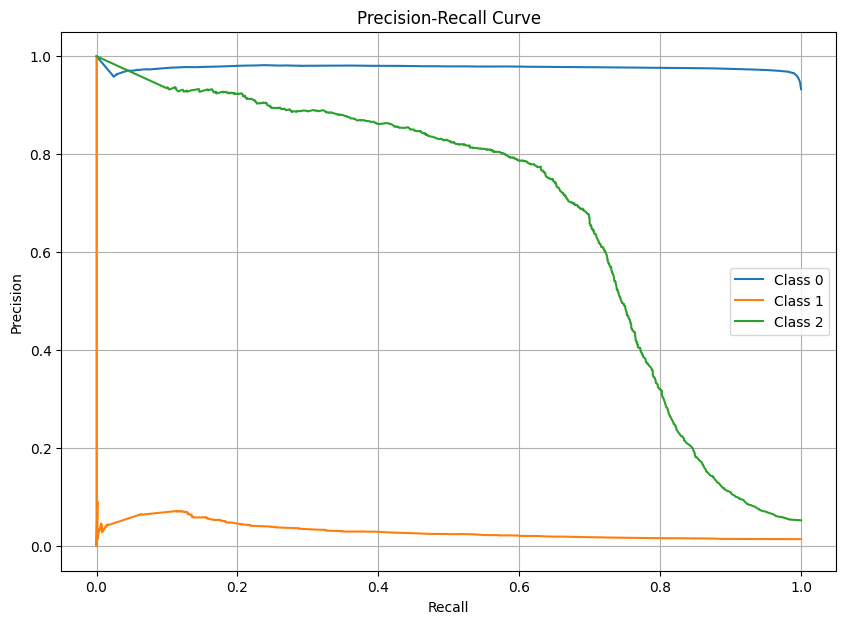

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

# Convert y_test and y_pred to binary form
y_test_binary = label_binarize(y_test, classes=rf_classifier.classes_)
y_pred_binary = rf_classifier.predict_proba(X_test)

# Compute precision-recall pairs for each class
precision = dict()
recall = dict()
thresholds = dict()
for i in range(len(rf_classifier.classes_)):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(y_test_binary[:, i], y_pred_binary[:, i])

# Plot precision-recall curve for each class
plt.figure(figsize=(10, 7))
for i in range(len(rf_classifier.classes_)):
    plt.plot(recall[i], precision[i], label=f"Class {i}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_curve, confusion_matrix, classification_report

# Calculating accuracy
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print("Accuracy - ANN:", accuracy_ann)

# Precision-Recall Curve (for binary classification only)
# precision_ann, recall_ann, _ = precision_recall_curve(y_test, y_pred_ann)

# Confusion Matrix
conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)
print("\nConfusion Matrix - ANN:")
print(conf_matrix_ann)

# Classification Report
class_report_ann = classification_report(y_test, y_pred_ann)
print("\nClassification Report - ANN:")
print(class_report_ann)


Accuracy - ANN: 0.9575863245271576

Confusion Matrix - ANN:
[[48789     0   428]
 [  731     0    29]
 [ 1050     0  1739]]

Classification Report - ANN:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     49217
           1       0.00      0.00      0.00       760
           2       0.79      0.62      0.70      2789

    accuracy                           0.96     52766
   macro avg       0.59      0.54      0.56     52766
weighted avg       0.94      0.96      0.95     52766



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


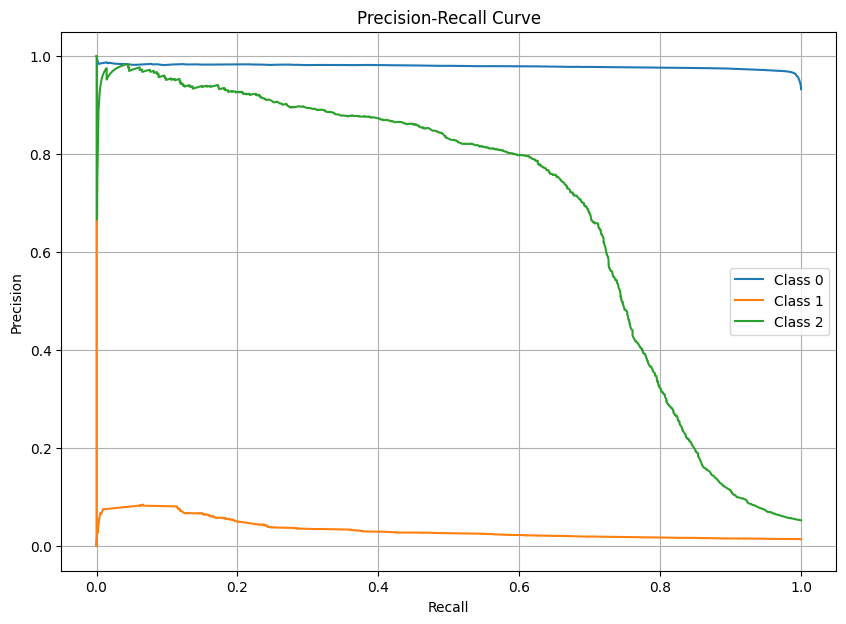

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

# Convert y_test and y_pred to binary form
y_test_binary = label_binarize(y_test, classes=rf_classifier.classes_)
y_pred_binary = gb_classifier.predict_proba(X_test)

# Compute precision-recall pairs for each class
precision = dict()
recall = dict()
thresholds = dict()
for i in range(len(rf_classifier.classes_)):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(y_test_binary[:, i], y_pred_binary[:, i])

# Plot precision-recall curve for each class
plt.figure(figsize=(10, 7))
for i in range(len(rf_classifier.classes_)):
    plt.plot(recall[i], precision[i], label=f"Class {i}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()